In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1635


<Axes: xlabel='Time'>

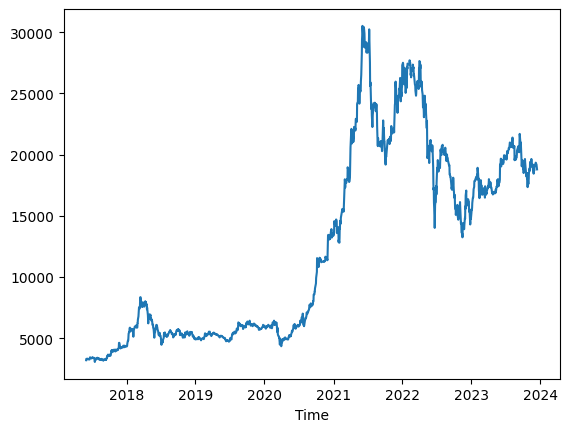

In [2]:
#2. Fetch data and visualize
VIB = stock_historical_data(symbol = "VIB", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VIB['Close']))
VIB
VIB["Close"].plot()

In [3]:
VIB['Lag'] = np.arange(len(VIB.index))
VIB = VIB[['Close', 'Lag']]
VIB

VIB = pd.DataFrame(VIB)
VIB.set_index("Lag", inplace= True)
VIB

,Close
Lag,
0,3210
1,3320
2,3290
3,3320
4,3340
...,...
1630,19200
1631,19200
1632,19050


In [4]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.6 * len(VIB))
test_size = int(0.6 * len(VIB))

train_data = VIB[:train_size]
test_data = VIB[train_size:]

In [5]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[11673.80199505],
       [11683.52817694],
       [11693.25435883],
       [11702.98054072],
       [11712.70672261],
       [11722.4329045 ],
       [11732.15908639],
       [11741.88526828],
       [11751.61145017],
       [11761.33763206],
       [11771.06381395],
       [11780.78999584],
       [11790.51617773],
       [11800.24235962],
       [11809.96854151],
       [11819.6947234 ],
       [11829.42090529],
       [11839.14708718],
       [11848.87326907],
       [11858.59945096],
       [11868.32563285],
       [11878.05181474],
       [11887.77799663],
       [11897.50417852],
       [11907.23036041],
       [11916.9565423 ],
       [11926.68272419],
       [11936.40890608],
       [11946.13508797],
       [11955.86126986],
       [11965.58745175],
       [11975.31363364],
       [11985.03981553],
       [11994.76599742],
       [12004.49217931],
       [12014.2183612 ],
       [12023.94454309],
       [12033.67072498],
       [12043.39690687],
       [12053.12308876],


In [7]:
# 6. 60 days prediction
last_index =  VIB.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[18034.72495112]
 [18044.45113301]
 [18054.1773149 ]
 [18063.90349679]
 [18073.62967868]
 [18083.35586057]
 [18093.08204246]
 [18102.80822435]
 [18112.53440624]
 [18122.26058813]
 [18131.98677002]
 [18141.71295191]
 [18151.4391338 ]
 [18161.16531569]
 [18170.89149758]
 [18180.61767947]
 [18190.34386136]
 [18200.07004325]
 [18209.79622514]
 [18219.52240703]
 [18229.24858892]
 [18238.97477081]
 [18248.7009527 ]
 [18258.42713459]
 [18268.15331648]
 [18277.87949837]
 [18287.60568026]
 [18297.33186215]
 [18307.05804404]
 [18316.78422593]
 [18326.51040782]
 [18336.23658971]
 [18345.9627716 ]
 [18355.68895349]
 [18365.41513538]
 [18375.14131727]
 [18384.86749916]
 [18394.59368105]
 [18404.31986294]
 [18414.04604483]
 [18423.77222672]
 [18433.49840861]
 [18443.2245905 ]
 [18452.95077239]
 [18462.67695428]
 [18472.40313617]
 [18482.12931806]
 [18491.85549995]
 [18501.58168184]
 [18511.30786373]
 [18521.03404562]
 [18530.76022751]
 [18540.4864094 ]

In [10]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 7880.071850136968
Testing MAPE: 25.466196131009234
Testing MAE: 5948.983629514643
MSLR:  0.1837198477065226


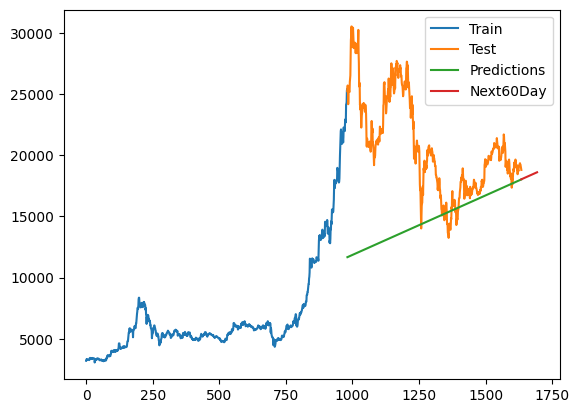

In [9]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()